In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [3]:
# Reading data from CSV file and loading into the dataframes

df_test = pd.read_csv('/content/sample_data/ALS_TestingData_78.csv')

df_train = pd.read_csv('/content/sample_data/ALS_TrainingData_2223.csv')


In [4]:
df_train

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,...,136.0,0.014035,997136,7,5.0,5,0.003643,7.00,6.0,5.0
2219,2420,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,...,141.0,0.009074,998047,5,4.0,3,0.003630,7.41,5.5,5.0
2220,2421,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,...,135.0,0.013123,998773,5,4.0,4,0.001825,9.00,6.0,5.0
2221,2422,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,...,136.0,0.007143,998908,8,4.5,2,0.010714,6.00,5.0,5.0


In [5]:
df_test

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,3,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,...,0,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148
1,4,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,...,0,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703
2,5,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,...,0,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410
3,6,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,...,5,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495
4,9,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,...,7,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,96,45.000000,42.0,39.5,37,0.010823,-0.683521,33,28.0,23,...,5,0.004329,6.0,5.50,5.0,0.002165,12.45,8.370,5.56,0.014913
74,97,47.709589,47.0,44.0,41,0.005381,-0.324733,26,19.0,11,...,0,0.005381,7.5,6.00,5.5,0.001845,13.92,10.265,8.37,0.004978
75,98,59.928767,47.0,44.0,40,0.009333,-0.330616,33,24.0,10,...,1,0.008000,7.5,6.50,6.0,0.002000,16.69,5.445,4.48,0.016280
76,99,61.000000,42.0,39.0,38,0.007843,-0.439230,37,33.0,31,...,4,0.005882,6.5,6.00,5.5,0.001961,10.66,7.390,5.81,0.009510


In [6]:
pd.set_option('display.max_rows', 100)

pd.options.display.max_rows = 100

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2223.0,1214.874944,696.678300,1.0,614.500000,1213.00000,1815.500000,2424.000000
Age_mean,2223.0,54.550157,11.396546,18.0,47.000000,55.00000,63.000000,81.000000
Albumin_max,2223.0,47.011134,3.233980,37.0,45.000000,47.00000,49.000000,70.300000
Albumin_median,2223.0,43.952542,2.654804,34.5,42.000000,44.00000,46.000000,51.100000
Albumin_min,2223.0,40.766347,3.193087,24.0,39.000000,41.00000,43.000000,49.000000
...,...,...,...,...,...,...,...,...
trunk_min,2223.0,2.955915,2.358095,0.0,1.000000,3.00000,5.000000,8.000000
trunk_range,2223.0,0.007136,0.004503,0.0,0.003643,0.00692,0.009639,0.042017
Urine.Ph_max,2223.0,6.820450,0.932141,5.0,6.000000,7.00000,7.000000,9.000000
Urine.Ph_median,2223.0,5.710639,0.625039,5.0,5.000000,6.00000,6.000000,9.000000


In [8]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,78.0,51.589744,28.468910,3.000000,27.250000,51.500000,74.750000,100.000000
Age_mean,78.0,56.025571,10.514606,24.583562,51.000000,57.000000,62.180822,77.000000
Albumin_max,78.0,45.256410,3.056549,38.000000,43.000000,45.500000,47.000000,51.000000
Albumin_median,78.0,42.173077,3.083341,35.000000,40.000000,42.250000,44.000000,49.000000
Albumin_min,78.0,38.910256,3.977815,25.000000,36.250000,39.000000,41.000000,47.000000
...,...,...,...,...,...,...,...,...
Urine.Ph_range,78.0,0.004544,0.004776,0.000000,0.002278,0.003390,0.004715,0.034483
White.Blood.Cell..WBC._max,78.0,9.341795,2.939529,4.110000,7.767500,8.750000,10.690000,22.490000
White.Blood.Cell..WBC._median,78.0,6.789103,1.683264,3.240000,5.878750,6.720000,7.730000,11.795000
White.Blood.Cell..WBC._min,78.0,5.286026,1.513861,1.430000,4.330000,5.320000,6.125000,9.500000


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Columns: 101 entries, ID to Urine.Ph_min
dtypes: float64(75), int64(26)
memory usage: 1.7 MB


In [10]:
#Checks if there are any null/NAN values in any columns

df_train.isnull().values.any()

False

#### There are no null/NAN values in the dataframe so it returned false

In [11]:
# Data for Analysis
df_train_mod = df_train.drop(labels=['ID','SubjectID'], axis=1)
df_test_mod = df_test.drop(labels=['ID','SubjectID'], axis=1)

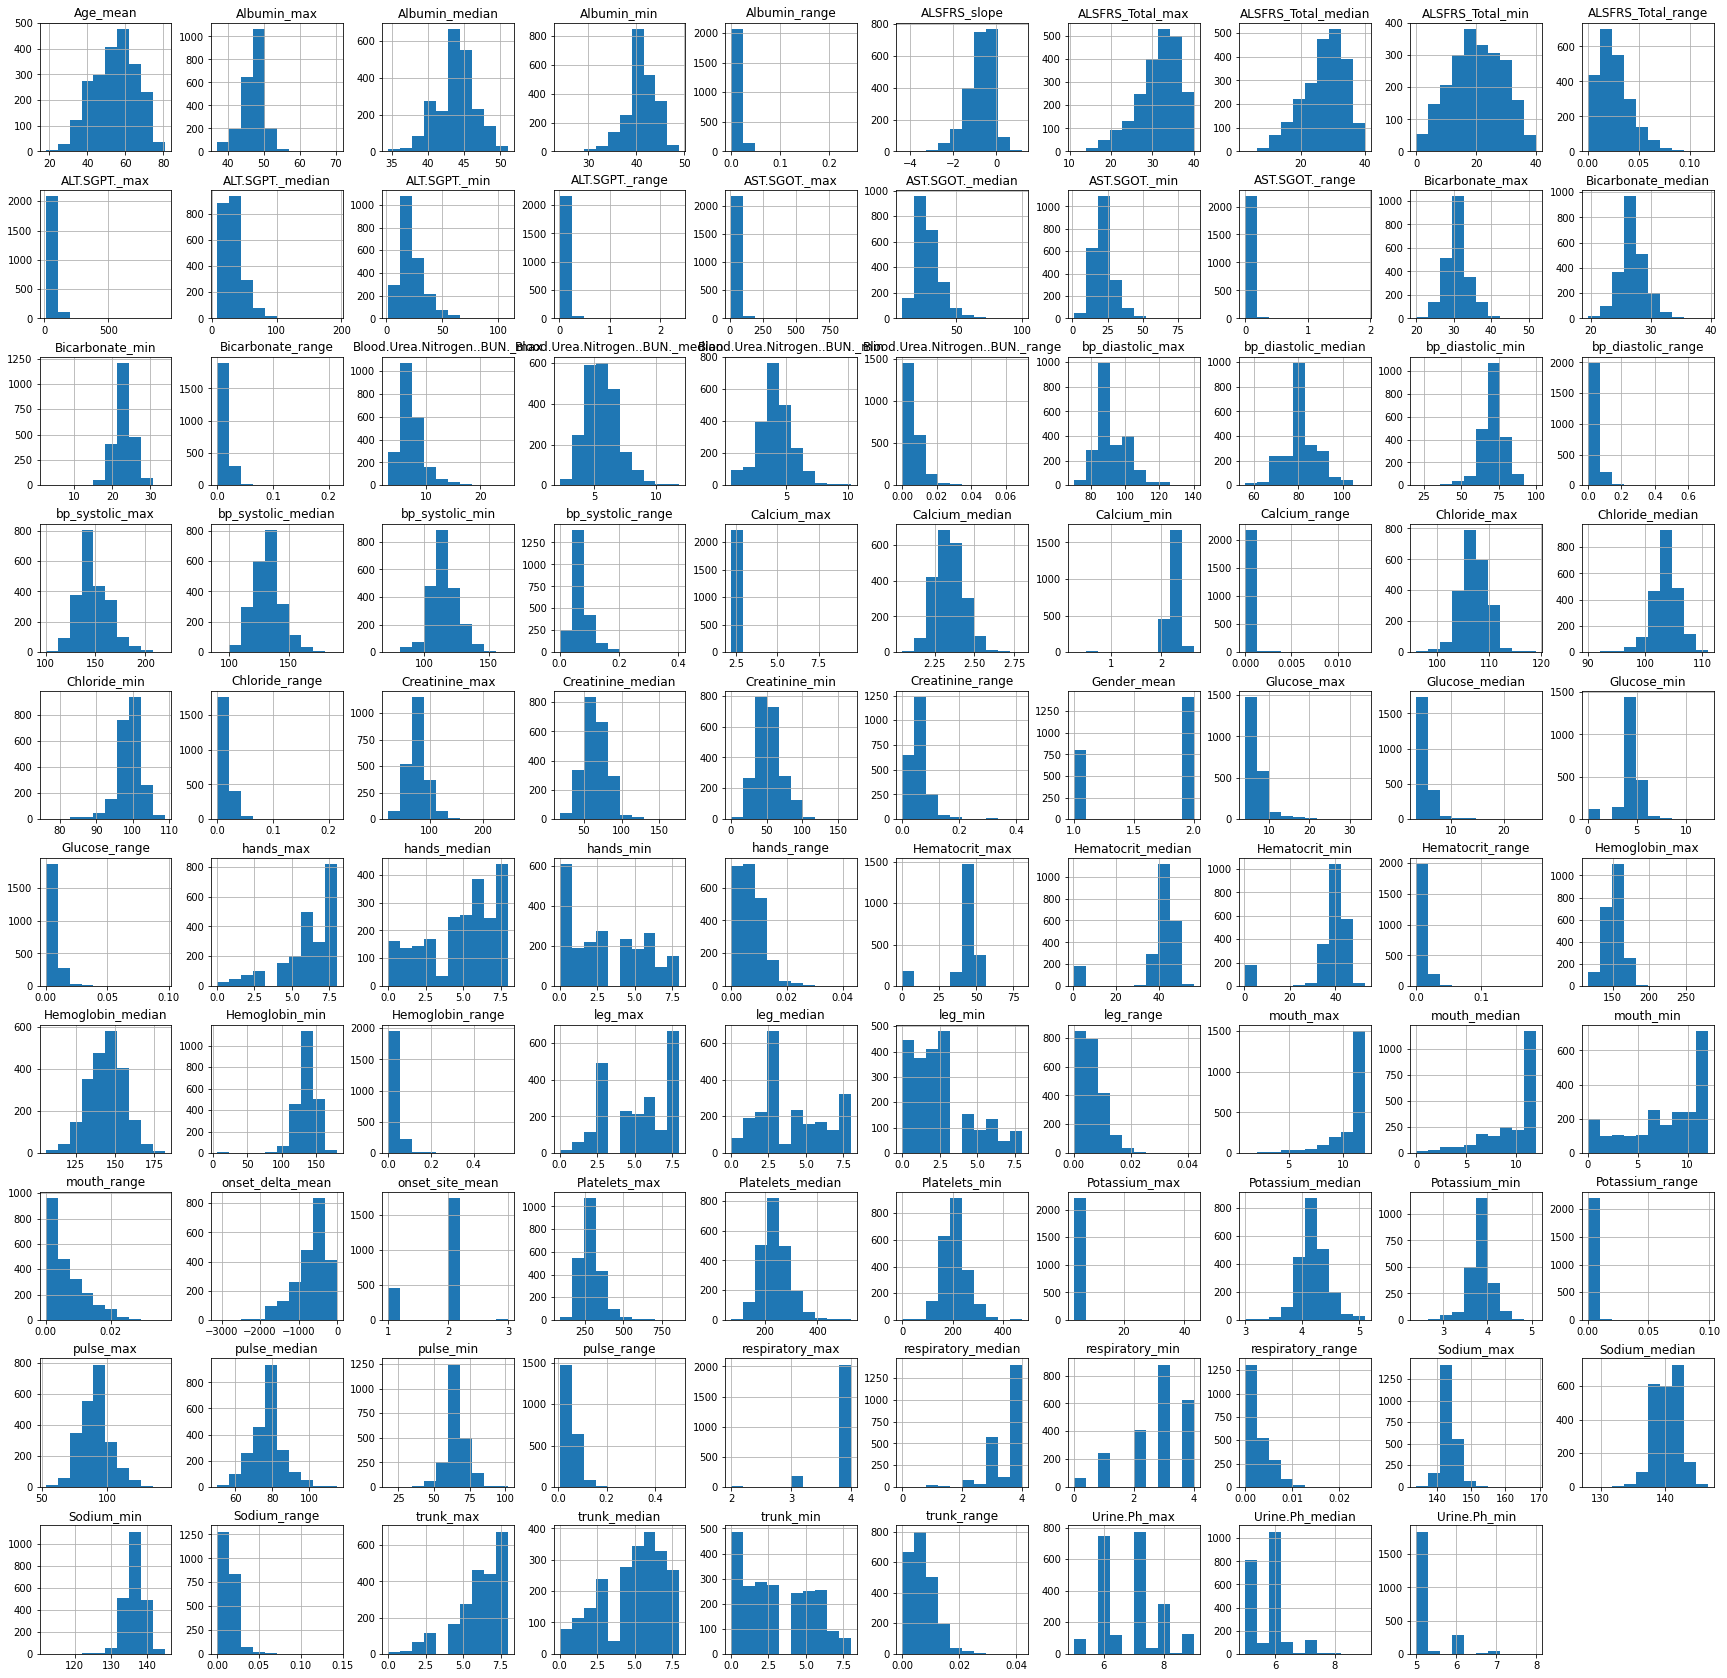

In [12]:
# To see the skewness of the data in each column
hplot = df_train_mod.hist(figsize=(30,30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6703d3bd0>,
      dtype=object)

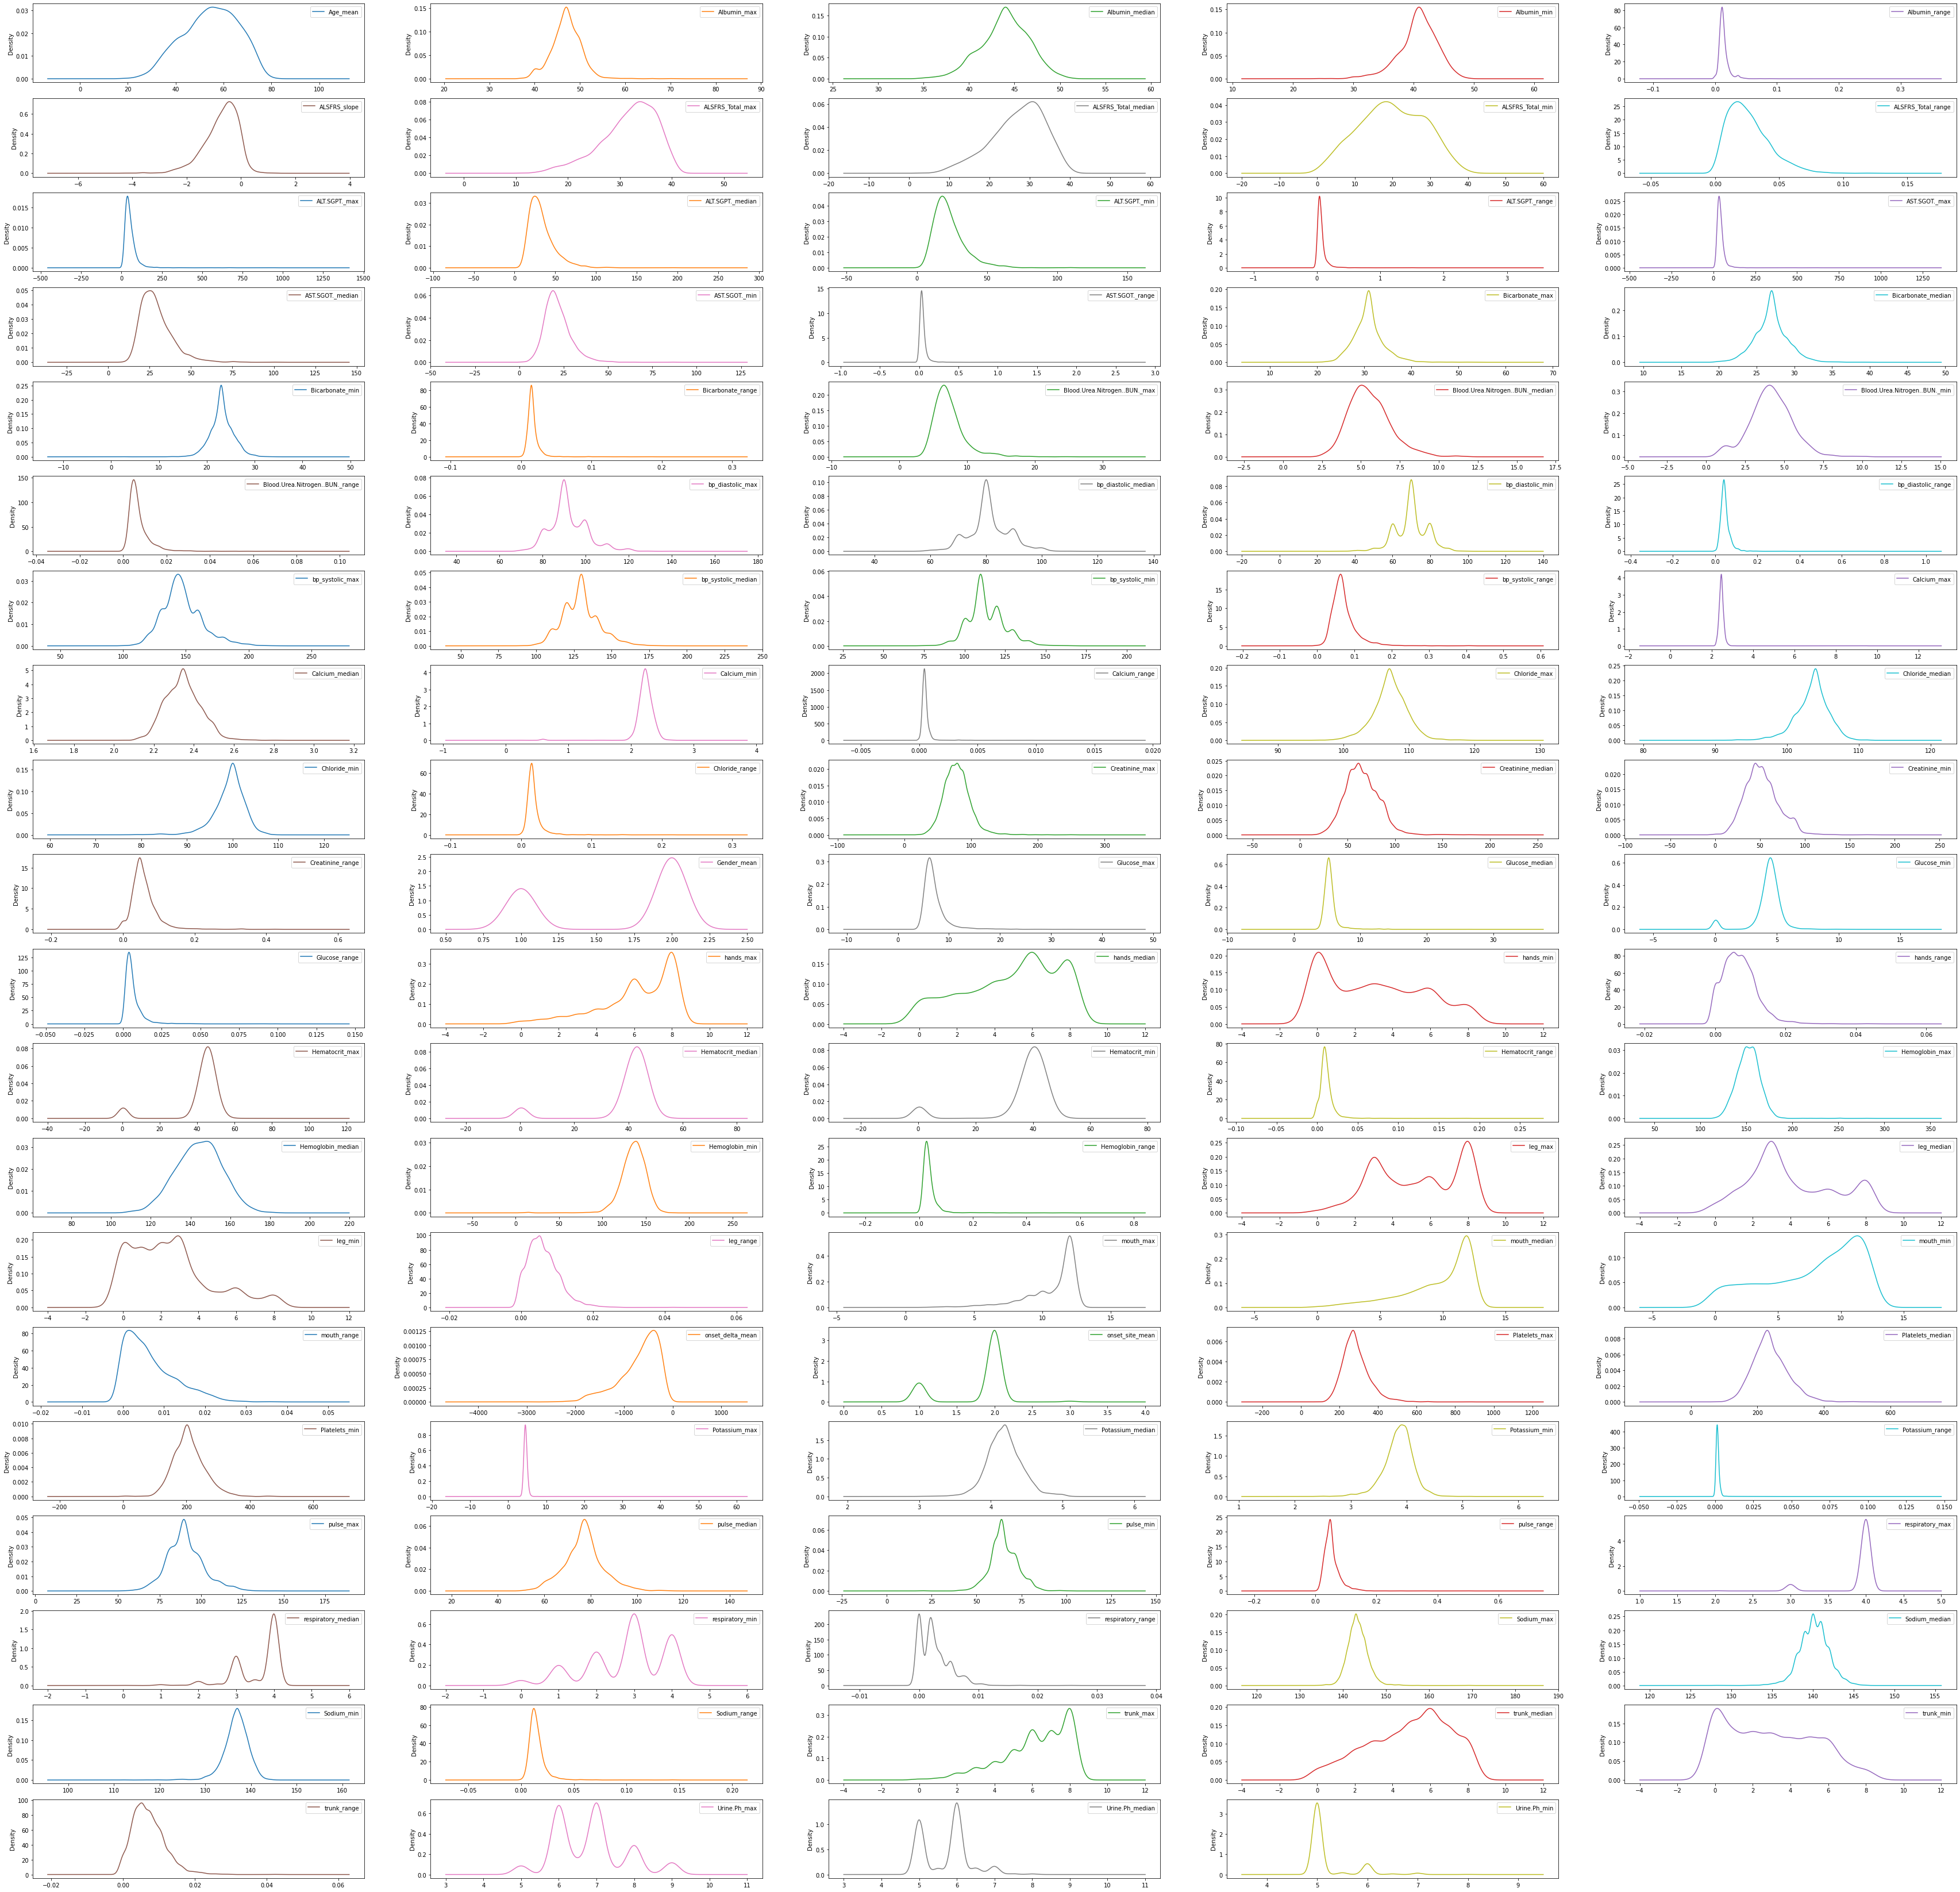

In [13]:
df_train_mod.plot(kind = 'kde' , subplots = True , layout=(20,5), sharex=False, sharey=False, figsize=(60,60))

In [14]:
#Columns that are observed to be skewed from the above density plots are choosen for log tranformation

skew_cols = ['Albumin_range','ALT.SGPT._max','ALT.SGPT._range','AST.SGOT._max','AST.SGOT._range','Bicarbonate_range',
        'bp_diastolic_range','Calcium_max','Calcium_range','Chloride_max','Glucose_median','Glucose_range',
        'Hematocrit_range','Hemoglobin_range','Potassium_max','Potassium_range','respiratory_max']

In [15]:


for col_name in skew_cols:
    df_train_mod[col_name] =  np.log( 1 + df_train_mod[col_name] )

In [16]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_rescaled = scaler.fit_transform(df_train_mod)  

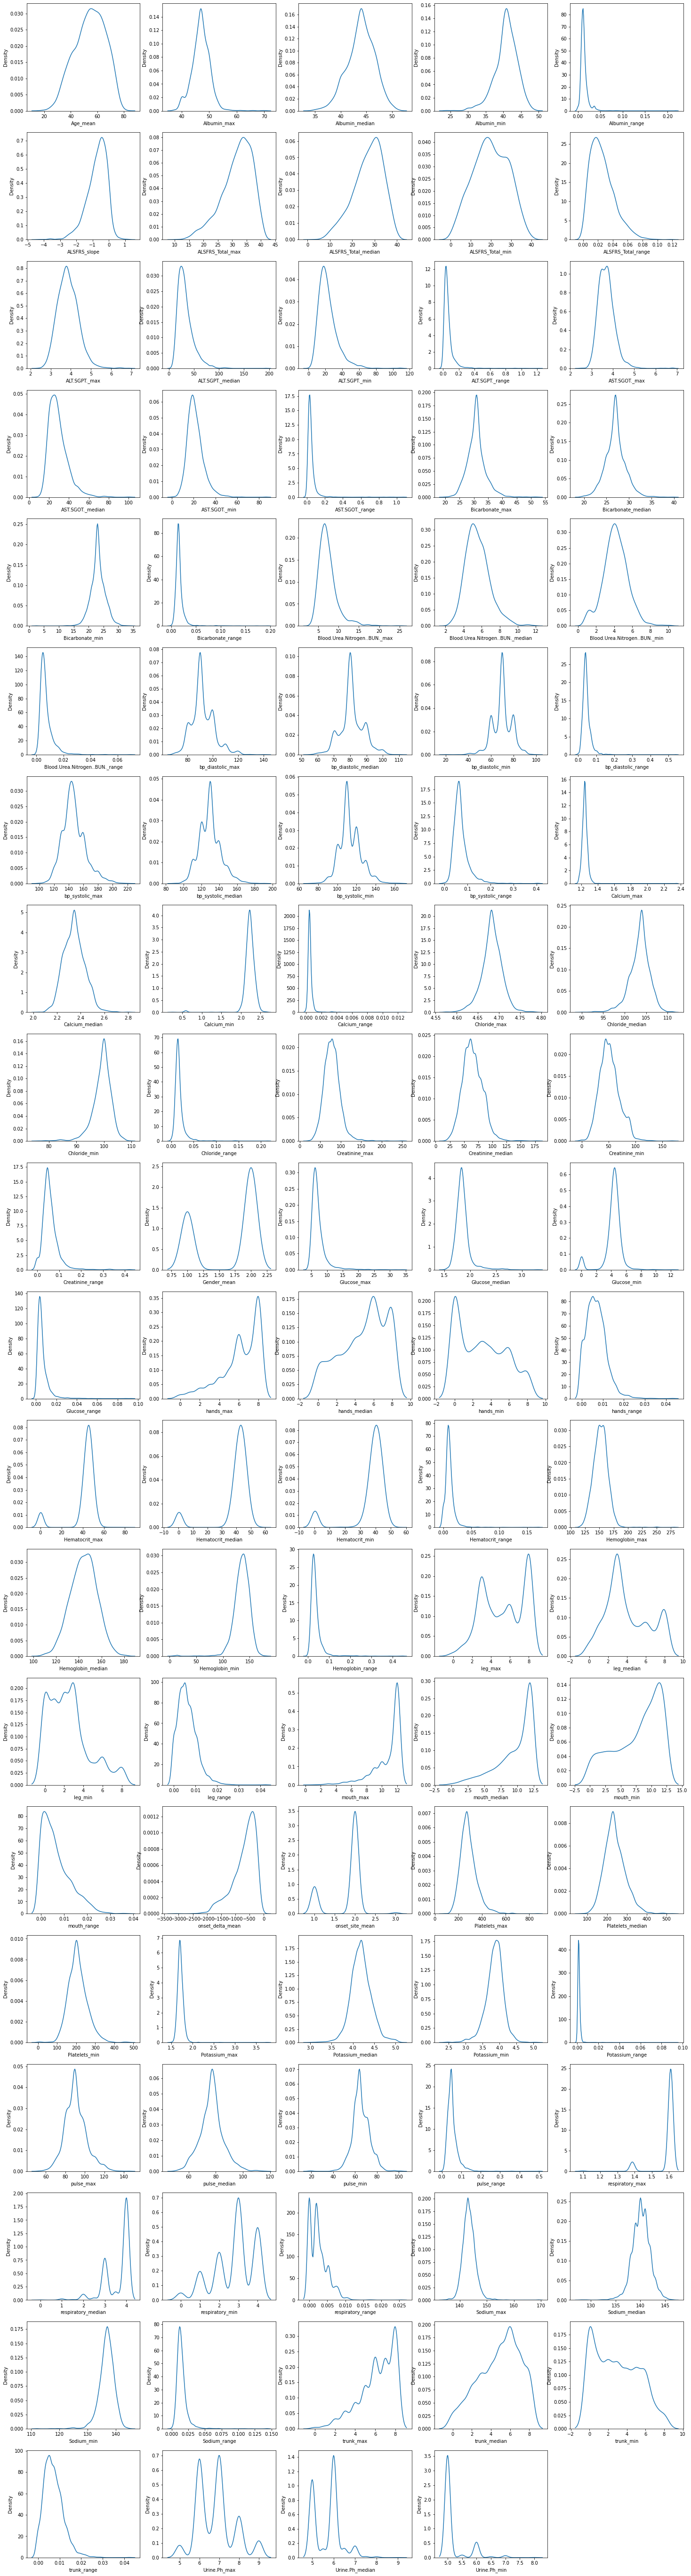

In [17]:
plt.figure(figsize=(25,120))
for i, col in enumerate(df_train_mod.columns):
    if df_train_mod[col].dtype != 'object':
        ax = plt.subplot(24, 5, i+1)
        sns.kdeplot(df_train_mod[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

In [18]:
#PCA for Dimensionality Reduction with

from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced_df = pca.transform(data_rescaled)

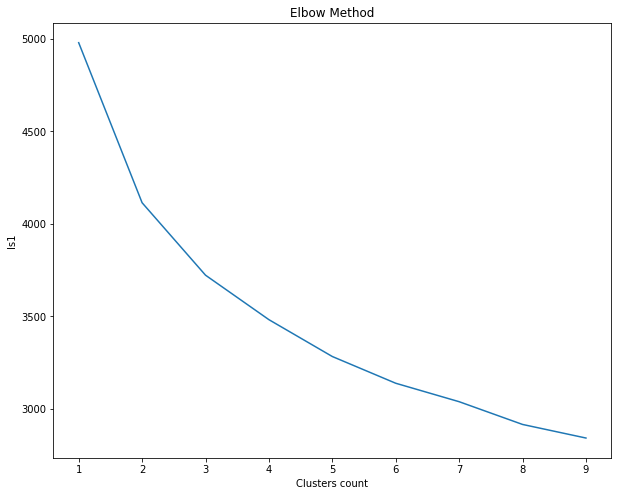

In [19]:
#Using the elbow method to select the K value 

ls1=[]

#loop to view the performace for 1 to 9 clusters
for i in range(1,10):
    #Initialize
    kmeans = KMeans(n_clusters = i,init ='k-means++', random_state =0)
    #Compute k-means clustering.
    kmeans.fit_predict(reduced_df)
    ls1.append(kmeans.inertia_)
plt.figure(figsize=(10, 8))
plt.plot(range(1,10), ls1)
plt.title('Elbow Method')
plt.xlabel('Clusters count')
plt.ylabel('ls1')
plt.show()

#### From the above graph we can see the k value 2 to 4 has maximum accuracy 

In [20]:
# Building the model with clusters = 2 
def Kmeans_model(data , cluster_count):
  kmeans = KMeans(n_clusters = cluster_count,init ='k-means++', random_state =0)
  kmeans.fit(data)
  cluster_lab = kmeans.predict(data)
  centroid = kmeans.cluster_centers_
  return (cluster_lab,centroid)

In [21]:
## model with k=2

clusters_2, centroid_2 = Kmeans_model(reduced_df , 2)

k_means_2 = pd.DataFrame(clusters_2)

k_means_2

,0
0,1
1,1
2,0
3,1
4,0
...,...
2218,1
2219,1
2220,0
2221,1


In [22]:
## model with k=3

clusters_3, centroid_3 = Kmeans_model(reduced_df , 3)

k_means_3 = pd.DataFrame(clusters_3)

k_means_3

,0
0,0
1,0
2,1
3,2
4,0
...,...
2218,2
2219,0
2220,1
2221,2


In [23]:
## model with k=4

clusters_4, centroid_4 = Kmeans_model(reduced_df , 4)

k_means_4 = pd.DataFrame(clusters_4)

k_means_4

,0
0,3
1,3
2,0
3,2
4,1
...,...
2218,2
2219,3
2220,0
2221,2


In [24]:
## Assign the cluster labels to the dataset


df_train_mod['cluster_id'] = clusters_4

df_train_mod

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,cluster_id
0,65,57.0,40.5,38.0,0.064103,-0.965608,30,28.0,22,0.021164,...,143.0,0.017422,8,7.0,7,0.002646,6.00,6.0,6.0,3
1,48,45.0,41.0,39.0,0.010399,-0.921717,37,33.0,21,0.028725,...,136.0,0.010453,8,7.0,5,0.005386,7.00,5.0,5.0,3
2,38,50.0,47.0,45.0,0.008889,-0.914787,24,14.0,10,0.025000,...,140.0,0.008929,5,0.0,0,0.008929,6.00,5.0,5.0,0
3,63,47.0,44.0,41.0,0.012038,-0.598361,30,29.0,24,0.014963,...,138.0,0.012469,5,5.0,3,0.004988,7.00,6.0,5.0,2
4,63,47.0,45.5,42.0,0.008258,-0.444039,32,27.5,20,0.020374,...,138.0,0.008292,6,4.0,1,0.008489,6.00,5.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,33,50.0,49.0,45.0,0.008734,-0.239501,35,32.5,30,0.009107,...,136.0,0.014035,7,5.0,5,0.003643,7.00,6.0,5.0,2
2219,61,47.0,45.0,42.0,0.009033,-0.388711,31,26.0,17,0.025408,...,141.0,0.009074,5,4.0,3,0.003630,7.41,5.5,5.0,3
2220,47,46.0,44.0,41.0,0.012038,-0.108631,26,23.0,20,0.010949,...,135.0,0.013123,5,4.0,4,0.001825,9.00,6.0,5.0,0
2221,37,49.0,44.0,39.0,0.017700,-0.855880,34,29.5,21,0.023214,...,136.0,0.007143,8,4.5,2,0.010714,6.00,5.0,5.0,2


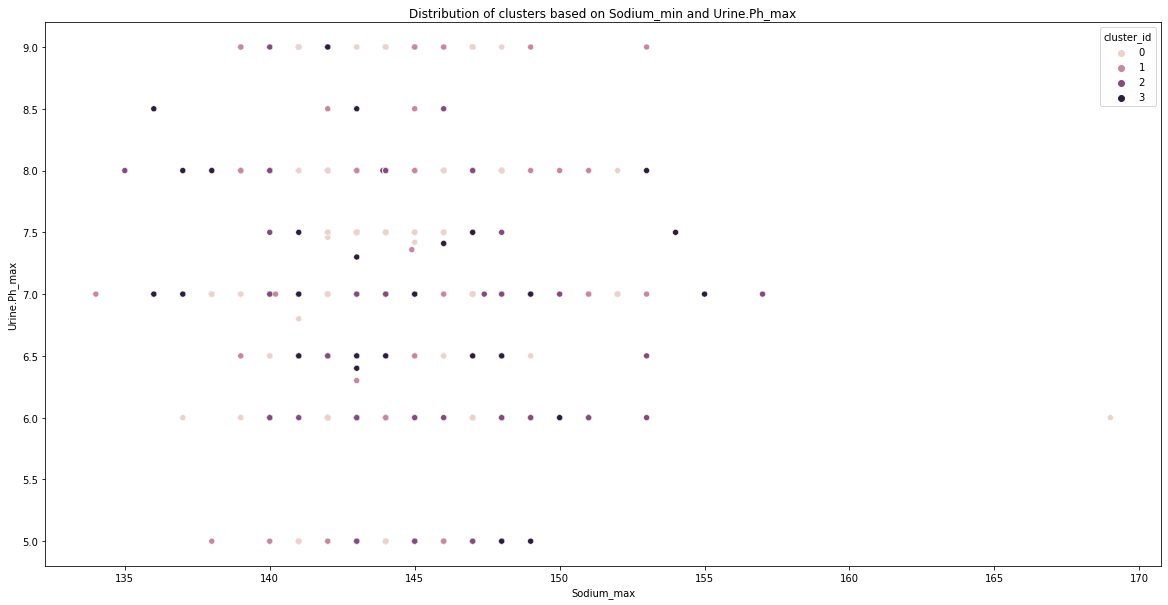

In [25]:
# Visuialize using the scatter plot for any two features

plt.figure(figsize=(20,10))
sns.scatterplot(data=df_train_mod, x='Sodium_max', y='Urine.Ph_max', hue='cluster_id')
plt.title('Distribution of clusters based on Sodium_min and Urine.Ph_max')
plt.show()

In [26]:
from sklearn.metrics import silhouette_score

# For k=2

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(reduced_df)

print('Silhoutte score of our model is ' + str(silhouette_score(reduced_df, kmeans.labels_)))

Silhoutte score of our model is 0.1556740891335885


In [27]:
from sklearn.metrics import silhouette_score

# For k=3

kmeans3 = KMeans(n_clusters=3, random_state=23)
kmeans3.fit(reduced_df)

print('Silhoutte score of our model is ' + str(silhouette_score(reduced_df, kmeans3.labels_)))

Silhoutte score of our model is 0.1404421735644054


In [28]:
from sklearn.metrics import silhouette_score

# For k=4

kmeans4 = KMeans(n_clusters=4, random_state=23)
kmeans4.fit(reduced_df)

print('Silhoutte score of our model is ' + str(silhouette_score(reduced_df, kmeans4.labels_)))

Silhoutte score of our model is 0.13215644676392638


In [29]:
#Test data 


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_test_rescaled = scaler.fit_transform(df_test_mod)


In [30]:
#PCA for Dimensionality Reduction for test data

from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(data_test_rescaled)
reduced_test_df = pca.transform(data_test_rescaled)

In [32]:
kmeans_test = KMeans(n_clusters=2, random_state=23)
kmeans_test.fit(reduced_test_df)
cluster_test_lab = kmeans_test.predict(reduced_test_df)
centroid_test = kmeans_test.cluster_centers_

In [34]:
df_test_mod['cluster_id'] = cluster_test_lab

df_test_mod

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range,cluster_id
0,65.906849,46.0,44.00,43,0.024590,-1.767329,33,5.0,2,0.028519,...,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148,1
1,54.000000,39.0,36.00,33,0.013100,-1.351852,32,23.0,14,0.039301,...,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703,1
2,56.394521,46.0,43.00,39,0.009736,-0.412429,15,10.0,2,0.017173,...,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410,1
3,72.619178,50.0,42.50,41,0.092784,-0.383403,34,24.0,21,0.033592,...,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495,0
4,65.000000,45.0,42.00,36,0.021327,0.000000,37,37.0,37,0.000000,...,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507,0
5,67.000000,40.0,35.00,25,0.038860,-1.407177,32,24.0,9,0.059585,...,0.015544,8.0,6.50,5.5,0.006477,9.26,6.010,5.22,0.010466,1
6,53.934247,46.0,45.00,41,0.010965,-0.434524,19,16.5,13,0.011881,...,0.003960,7.5,7.00,6.0,0.003289,12.50,6.350,4.28,0.018026,1
7,54.550685,47.0,45.00,42,0.009225,-0.439230,34,19.5,11,0.044402,...,0.007722,7.5,6.50,6.0,0.002768,10.85,7.050,6.15,0.008672,1
8,73.000000,43.0,40.50,38,0.012136,-0.117439,31,31.0,27,0.009709,...,0.004854,6.5,5.50,5.0,0.003641,7.57,5.240,3.79,0.009175,0
9,37.000000,50.0,46.00,44,0.015152,-0.444039,20,16.0,12,0.020202,...,0.007576,6.5,6.00,5.5,0.002525,5.98,4.940,3.99,0.005025,1


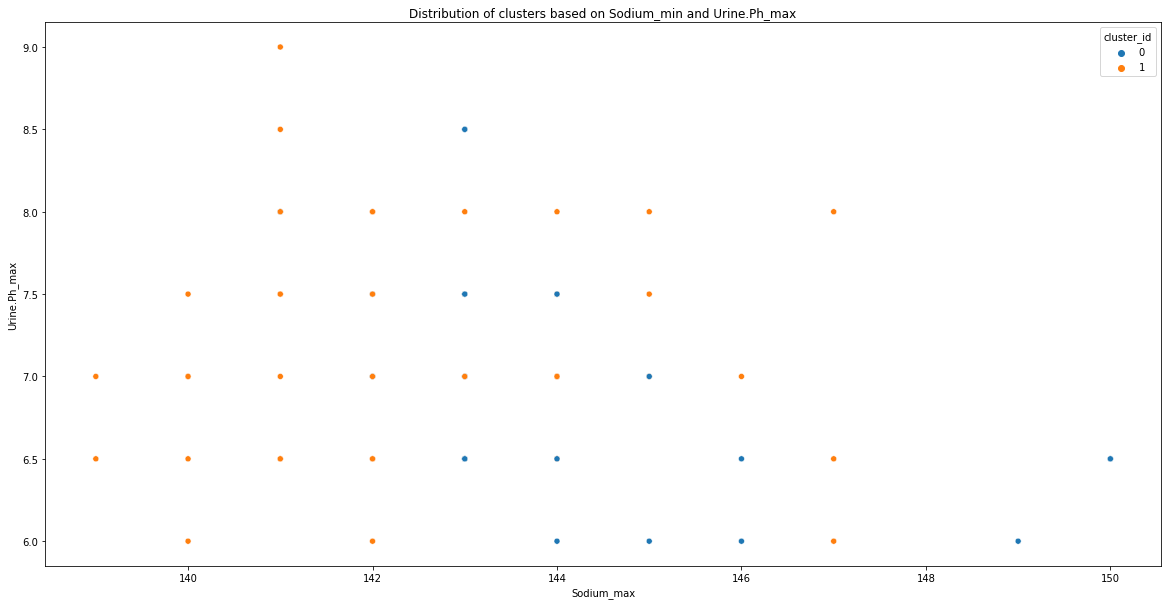

In [35]:
# Visuialize using the scatter plot for any two features

plt.figure(figsize=(20,10))
sns.scatterplot(data=df_test_mod, x='Sodium_max', y='Urine.Ph_max', hue='cluster_id')
plt.title('Distribution of clusters based on Sodium_min and Urine.Ph_max')
plt.show()